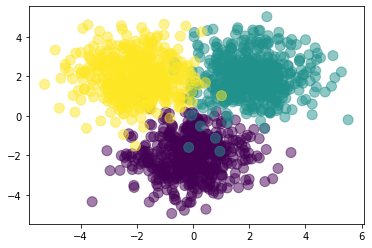

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#generate random data
n = 500

X1 = np.random.randn(n, 2) + np.array([0, -2])
X2 = np.random.randn(n, 2) + np.array([2, 2])
X3 = np.random.randn(n, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*n + [1]*n + [2]*n)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

T = np.zeros((len(Y), 3))
for i in range(len(Y)):
  T[i, Y[i]] = 1

In [0]:
def sigmoid(X):
  return 1/(1 + np.exp(-X))

def softmax(y):
  ye = np.exp(y)
  ys = np.sum(ye, axis=1, keepdims=True)
  return ye/ys

def feedforward(X, W1, b1, W2, b2):
  Z = sigmoid(X.dot(W1) + b1)
  Y = softmax(Z.dot(W2) + b2)

  return Y, Z

def cost(T, output):
  return -np.sum(T * np.log(output + 1e-8))

def der_w2(Z, T, Y):
  return Z.T.dot(Y-T)

def der_b2(T, Y):
  return (Y-T).sum(axis=0)

def der_w1(X, Z, T, Y, W):
  return X.T.dot((Y-T).dot(W2.T)*Z*(1-Z))

def der_b1(T, Y, W2, Z):
  return ((Y-T).dot(W2.T)*Z*(1-Z)).sum(axis=0)

def predict(p_y):
    return np.argmax(p_y, axis=1)

def error_rate(p_y, t):
    prediction = predict(p_y)
    return np.mean(predict(p_y) != predict(t))

In [0]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X, T = shuffle(X, T)
X_train, X_test, Y_train, Y_test = train_test_split(X, T, test_size=0.2)

N, D = X_train.shape
M = 2
K = 3

# No Momentum
W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)
LL = []
lr = 0.0001
reg = 0.01

t0 = datetime.now()
for epoch in range(50):
  output, hidden = feedforward(X_train, W1, b1, W2, b2)

  #gradient descent!
  W2 -= lr *(der_w2(hidden, Y_train, output) + reg*W2)
  b2 -= lr *(der_b2(Y_train, output) + reg*b2)
  W1 -= lr *(der_w1(X_train, hidden, Y_train, output, W2) + reg*W1)
  b1 -= lr *(der_b1(Y_train, output, W2, hidden) + reg*b1)

  output_test, _ = feedforward(X_test, W1, b1, W2, b2)
  ll = cost(output_test, Y_test)
  LL.append(ll)

output, _ = feedforward(X_test, W1, b1, W2, b2)
print("Final error rate:", error_rate(output, Y_test))
print("Elapsed time for no momentum:", datetime.now() - t0)

Final error rate: 0.10333333333333333
Elapsed time for no momentum: 0:00:00.031086


In [0]:
# Momentum
W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)
LL_mom = []
lr = 0.0001
reg = 0.01
vW2, vb2, vW1, vb1 = 0, 0, 0, 0

t0 = datetime.now()
for epoch in range(50):
  output, hidden = feedforward(X_train, W1, b1, W2, b2)

  #gradients
  gW2 = der_w2(hidden, Y_train, output) + reg*W2
  gb2 = der_b2(Y_train, output) + reg*b2
  gW1 = der_w1(X_train, hidden, Y_train, output, W2) + reg*W1
  gb1 = der_b1(Y_train, output, W2, hidden) + reg*b1
  
  #velocities
  vW2 = mu*vW2 - lr*gW2
  vb2 = mu*vb2 - lr*gb2
  vW1 = mu*vW1 - lr*gW1
  vb1 = mu*vb1 - lr*gb1

  #final updates
  W2 += vW2
  b2 += vb2
  W1 += vW1
  b1 += vb1

  output_test, _ = feedforward(X_test, W1, b1, W2, b2)
  ll = cost(output_test, Y_test)
  LL_mom.append(ll)

output, _ = feedforward(X_test, W1, b1, W2, b2)
print("Final error rate:", error_rate(output, Y_test))
print("Elapsed time for momentum:", datetime.now() - t0)

Final error rate: 0.02666666666666667
Elapsed time for momentum: 0:00:00.038246


In [0]:
# Nesterov Momentum
W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)
LL_nes = []
lr = 0.0001
reg = 0.01
vW2, vb2, vW1, vb1 = 0, 0, 0, 0

t0 = datetime.now()
for epoch in range(50):
  output, hidden = feedforward(X_train, W1, b1, W2, b2)

  #gradients
  gW2 = der_w2(hidden, Y_train, output) + reg*W2
  gb2 = der_b2(Y_train, output) + reg*b2
  gW1 = der_w1(X_train, hidden, Y_train, output, W2) + reg*W1
  gb1 = der_b1(Y_train, output, W2, hidden) + reg*b1
  
  #velocities
  vW2 = mu*vW2 - lr*gW2
  vb2 = mu*vb2 - lr*gb2
  vW1 = mu*vW1 - lr*gW1
  vb1 = mu*vb1 - lr*gb1

  #final updates
  W2 += mu*vW2 - lr*gW2
  b2 += mu*vb2 - lr*gb2
  W1 += mu*vW1 - lr*gW1
  b1 += mu*vb1 - lr*gb1

  output_test, _ = feedforward(X_test, W1, b1, W2, b2)
  ll = cost(output_test, Y_test)
  LL_nes.append(ll)

output, _ = feedforward(X_test, W1, b1, W2, b2)
print("Final error rate:", error_rate(output, Y_test))
print("Elapsed time for Nesterov momentum:", datetime.now() - t0)

Final error rate: 0.03666666666666667
Elapsed time for Nesterov momentum: 0:00:00.033290


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


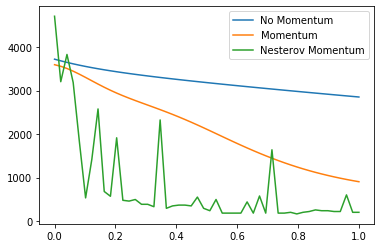

In [0]:
x1 = np.linspace(0, 1, len(LL))
plt.plot(x1, LL, label="No Momentum")
x2 = np.linspace(0, 1, len(LL_mom))
plt.plot(x2, LL_mom, label="Momentum")
x3 = np.linspace(0, 1, len(LL_nes))
plt.plot(x3, LL_nes, label="Nesterov Momentum")
plt.legend()
plt.show()